In [2]:
import os
import polars as pl
from RIG import RuleInstanceGenerator
import pandas as pd

csv_path = "data/data_yuda.csv"
df = pl.read_csv(csv_path)

rig = RuleInstanceGenerator()



ValueError: PROJECT_DIRECTORY is not set or the path does not exist: None

In [2]:

# folder_path = "data/rule_types/"
# for file_name in os.listdir(folder_path):
#    if file_name.endswith(".json"):
#         print(rig.new_rule_type(folder_path + file_name))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [3]:

def clean_text(text):
    """Remove all non-alphanumeric characters and convert to lowercase."""
    return ''.join(char.lower() for char in text if char.isalnum())

def evaluate_accuracy():
    classification = rig.get_instance.classifier
    rows = []
    correct_predictions = 0

    # Iterate through the DataFrame rows
    for row in df.iter_rows(named=True):
        # Extract the free_text, actual type_name, and expected classification
        free_text = row['free_text']
        actual_type_name = row['rule_types_names']
        id_free_text = row['id']

        # Predict the type name using the RAG API
        predicted_type_name = str(classification.predict(free_text)[0])

        # Clean strings for comparison
        actual_type_name_cleaned = clean_text(actual_type_name)
        predicted_type_name_cleaned = clean_text(predicted_type_name)

        # Debugging: Print the cleaned strings
        # print(f"Actual (cleaned): {actual_type_name_cleaned}")
        # print(f"Predicted (cleaned): {predicted_type_name_cleaned}")

        # Calculate the score (1 for correct, 0 for incorrect)
        score = 1 if predicted_type_name_cleaned == actual_type_name_cleaned else 0
        print(score)
        correct_predictions += score

        # Append the results to the rows
        rows.append({
            "id": id_free_text,
            "score": score,
            "predicted": predicted_type_name_cleaned,
            "actual": actual_type_name_cleaned,
            "free_text": free_text,
        })

    # Convert rows to a DataFrame
    results_df = pl.DataFrame(rows)

    # Calculate the final score
    accuracy = correct_predictions / len(df)

    return results_df, accuracy

# Run the evaluation
results_df, final_score = evaluate_accuracy()

# Print the final accuracy score
print(f"Accuracy Score: {final_score:.2%}")

# Print rows where the prediction was incorrect
errors = results_df.filter(pl.col("score") == 0).to_dicts()
# print("Errors:", errors)

# Optional: Save errors to a CSV
results_df.filter(pl.col("score") == 0).write_csv("output/classification_errors.csv")

print("results_df['actual'].unique():\n")
for i, _ in enumerate(results_df['actual'].unique()):
    print(i, _)

print("results_df['predicted'].unique():\n")
for i, _ in enumerate(results_df['predicted'].unique()):
    print(i, _)

results_df = results_df.to_pandas()



1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1


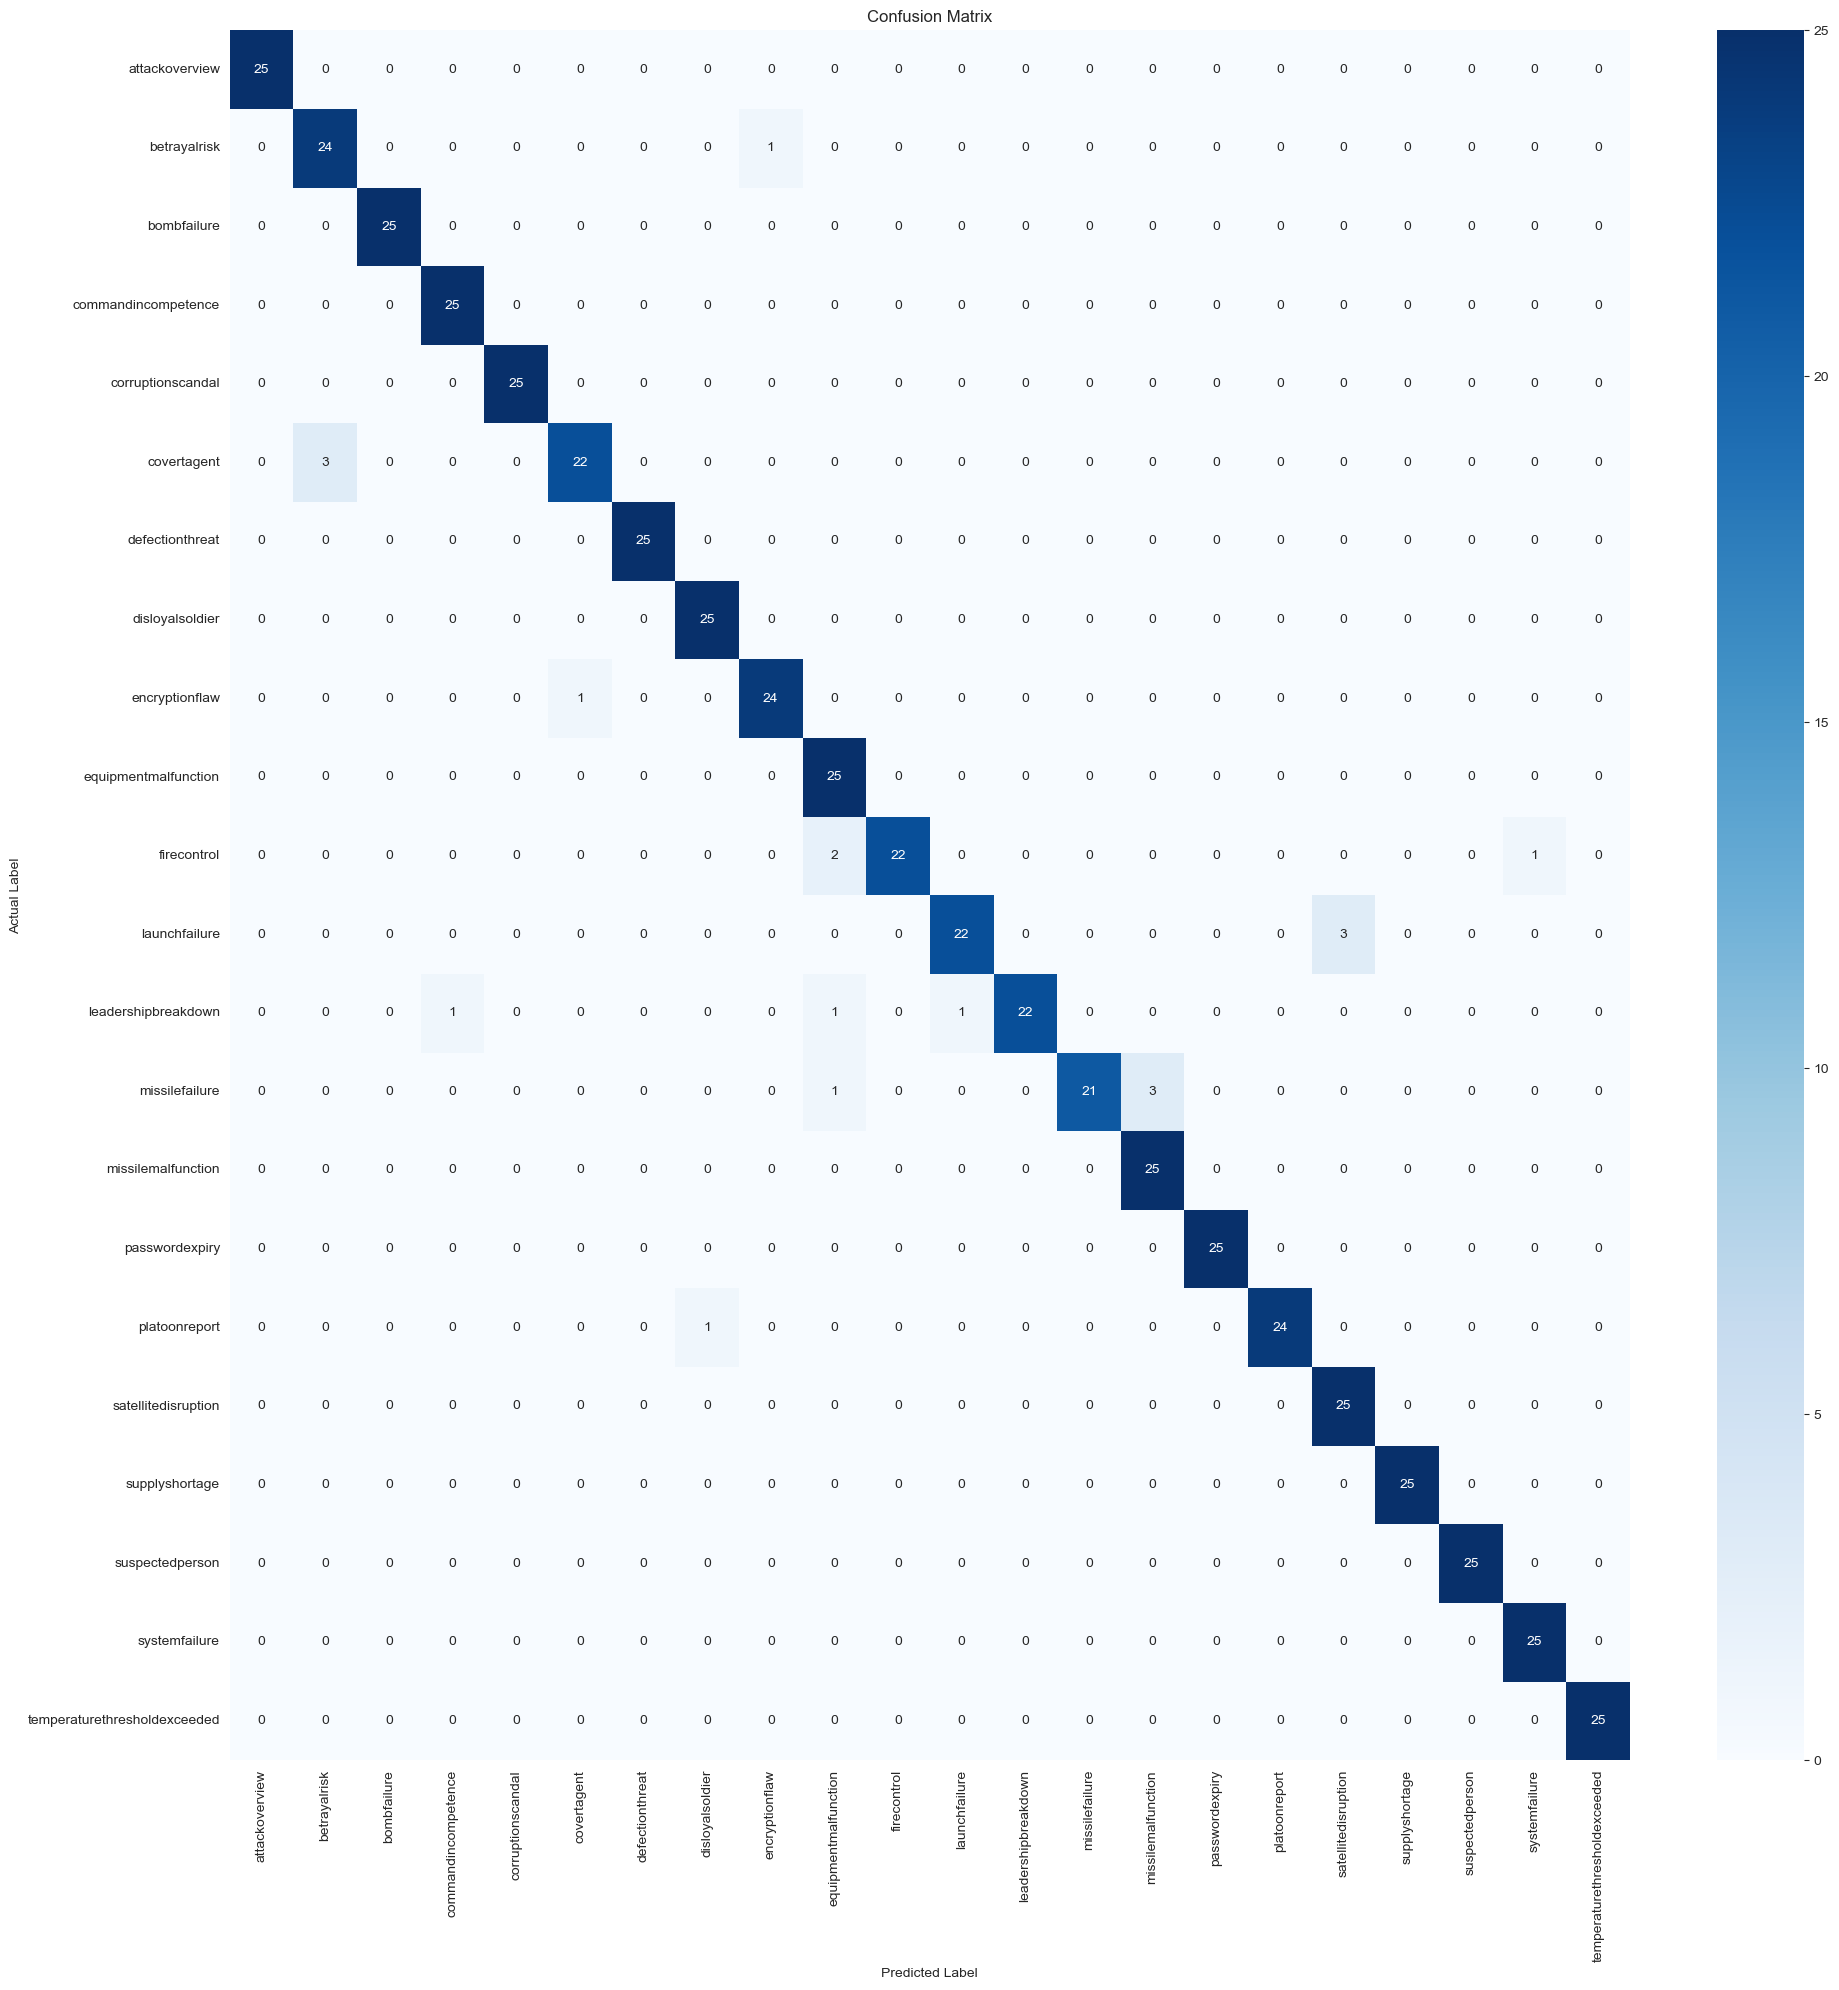

In [4]:

confusion_matrix = pd.crosstab(
    results_df["actual"],
    results_df["predicted"],
    # normalize='index'
)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(
    confusion_matrix,
    annot=True,  # Show numbers in each cell
    cmap='Blues',  # Color scheme
    fmt='g',  # Format for the annotations
    xticklabels=confusion_matrix.columns
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()
plt.show()

In [2]:
rig.get_rule_instance("hello how are you")

Query failed: HTTPConnectionPool(host='localhost', port=8080): Max retries exceeded with url: /v1/chat/completions (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x34a9b94f0>: Failed to establish a new connection: [Errno 61] Connection refused'))


{'rule_instance': None,
 'is_error': True,
 'error_message': "Processing failed: ConnectionError, HTTPConnectionPool(host='localhost', port=8080): Max retries exceeded with url: /v1/chat/completions (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x34a9b94f0>: Failed to establish a new connection: [Errno 61] Connection refused'))",
 'free_text': 'hello how are you',
 'type_name': None,
 'rag_score': None,
 'model_response': None,
 'schema': None,
 'time': '2024-12-04|12:51:49',
 'inference_time': 0.24588489532470703}